# Visualizing regressions and univariate and multivariate distributions with seaborn

In this visualization project, a powerful statistical visualization library, seaborn, will be used to visualize the [auto-mpg dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG), which contains the fuel efficiency (in miles per gallon, mpg), number of cylinders, horsepower, weight, year, manufacturing orignal, etc. of the 392 automobiles manufactured from 1970 to 1982.  The data has been pre-processed for this project.

In [64]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Read and inspect data

In [65]:
# Read data into a DataFrame: auto
auto = pd.read_csv('auto-mpg.csv')

# Peak at the first 5 rows of auto
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


## 2. Plot simple linear regressions

Seaborn provides a very convenient interface to generate complex and great-looking statistical plots.  We can use seaborn to fit and visualize a simple linear regression between two variables using sns.lmplot().  You might wonder why we don't just use matplotlib directly. Although seanborn is built on matplotlib, one of the major differences between seaborn and matplotlib is that we can pass pandas DataFrames directly to seaborn by refering to the columns to be plotted by their column names.  For example, if we want to plot the column 'weight' vesus the column 'hp' from the DataFrame 'auto', we can call sns.lmplot(x='weight', y='hp', data=auto).  Let's put this in action!

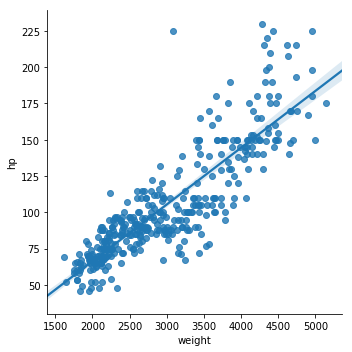

In [66]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)
plt.show()

There is a strong correlation between horsepower and weight, as shown by a first-order linear regression.

## 3. Plot higher-order regressions

When there is a more complex relationship between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between them. Seaborn makes it easy to compute and visualize regressions of higher orders. The function sns.regplot() will do the job.

Now, let's look at the variables 'weight' and 'mpg'. This time we will need to show the data points in a scatter plot first, and then use the argument scatter=None in the sns.regplot() function to prevent plotting the scatter points again. 

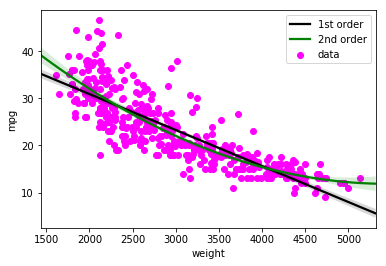

In [80]:
# Generate a scatter plot of 'weight' and 'mpg' using magenta circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='magenta', marker='o')

# Plot in black a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, label='1st order', color='black') # order=1 by default

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, label='2nd order', color='green', order=2)

# Add a legend on the upper right and display the plot
plt.legend(loc='upper right')
plt.show()

It seems like a second order regression is necessary to accurately capture the relationship between weight and fuel efficiency.

## 4. Group linear regressions

Often we want to compare trends between different groups. Seaborn makes it possible to apply linear regressions separately for data subsets by applying a groupby operation hue='categorical variable'. This will tell seaborn to group data observations by the categorical variable. The distinct groups of data points are used to produce distinct regressions with different hues in the plot. 

Let's re-plot the 'weight' and 'hp' data by origin, i.e. region/country of manufacturing.

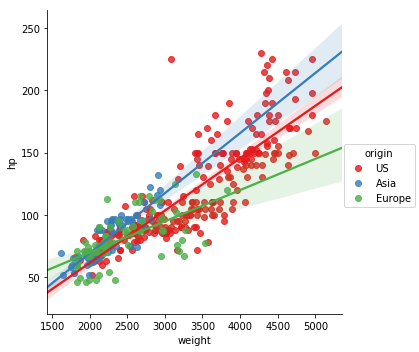

In [68]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight', y='hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show()

US automobiles seem to have higher horsepower at a given weight. 
<br>
<br>
We can also group the linear regressions by row or column instead of overlaying them in the same plot by passing the argument row='categorical variable' or col='categorical variable'.

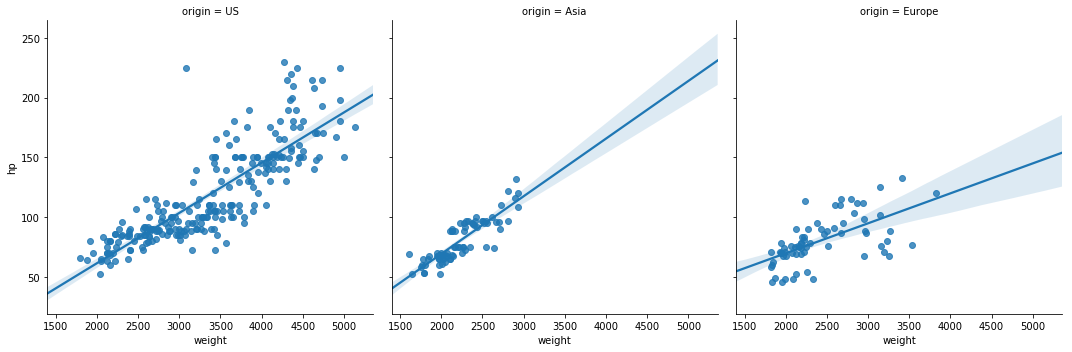

In [69]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, col='origin')

# Display the plot
plt.show()

It is easier to make sense of the three line regressions separately by their origin.

## 5. Visualize univariate distributions

Linear regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a categorical variable, and this is called univariate distribution. Seaborn provides a variety of plot types to show univariate distributions.

### 5.1 Strip plots

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual data points. For vertical strip plots (default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.
<br>
<br>
Let's look at the continuous variable 'hp' and the categorical variable 'cyl'.

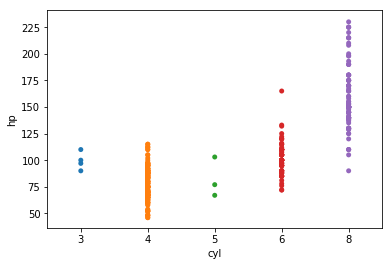

In [81]:
# Make a strip plot of 'hp' grouped by 'cyl'
sns.stripplot(x='cyl', y='hp', data=auto)

# Display the plot
plt.show()

Notice that the data points are overlapped vertically and are difficult to distinguish in strip plots. Fortunately, the argument jitter=True helps spread out the overlapping points.

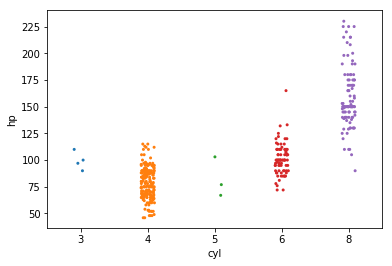

In [82]:
# Make the strip plot again using jitter and a smaller point size
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=3)

# Display the plot
plt.show()

Both strip plots show that automobiles with more cylinders tend to have higher horsepower. The second plot gives a better sense of the horsepower distribution by the number of cylinders.

### 5.2 Swarm plots

A strip plot can be visually crowded even with the jitter applied and smaller point sizes. In this case, an alternative is the swarm plot (sns.swarmplot()), which is very similar but spreads out the data points to avoid overlap and provides a better visualization.

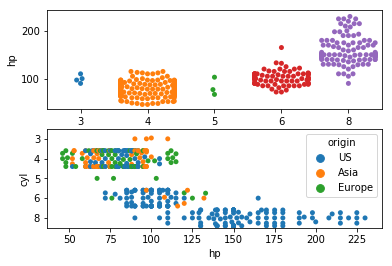

In [85]:
# Generate a swarm plot of 'hp' grouped vertically by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto, orient='v')

# Generate a swarm plot of 'hp' grouped horizontally by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

# Display the plot
plt.show()

US automobiles have more cylinders and higher horsepower.

### 5.3 Violin plots

Both strip and swarm plots visualize all the data points. For very large datasets, this can result in overplotting. Therefore, it would be more useful to use plot types that could provide more descriptive statistics of the data. Seaborn's violin plot can do just that!

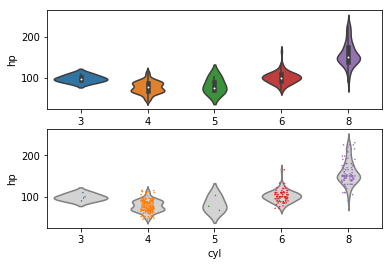

In [73]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

# Display the plot
plt.show()

Violin plots are a useful way of visualizing the distribution relationship between a continuous variable and a categorical variable, in this case horsepower and the number of cylinders, respectively.

## 6. Visualize multivariate distributions

There are times we would like to figure out how two continuous variables vary together. There are many ways to visualize how pairs of continuous variables vary jointly. Regression plots are one way. Another is to visualize a bivariate distribution.

### 6.1 Joint plot

Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. Let's explore the bivariate distribution between the horsepower and fuel efficiency.

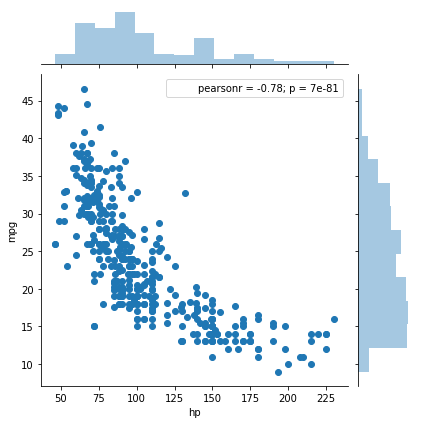

In [74]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()

The seaborn function sns.jointplot() has a parameter ['kind'](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to specify how to visualize the joint variation of two continuous variables. 

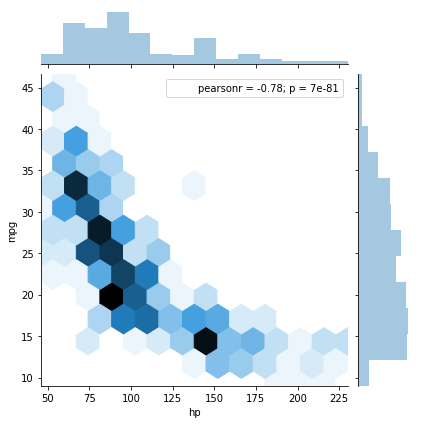

In [75]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()

Unsurprisingly, the fuel efficiency decreases as horsepower increases. You might want to refresh your understanding of the concepts of the Pearson correlation coefficient and p-value.

### 6.2 Pair plot

The function sns.jointplot() is restricted to representing joint variation between only two variables. To visualize multivariate relationships, we can use the function sns.pairplot(). It constructs a grid of all joint plots pairwise from all pairs of continuous columns in a DataFrame. The syntax is very simple: sns.pairplot(DataFrame). The continuous columns are identified, and the corresponding joint plots are generated in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.
<br>
<br>
In oder to make the visualization simpler, we will generate a new DataFrame consisting only three columns, 'mpg', 'hp', and 'origin'.

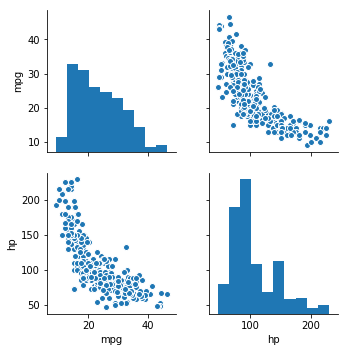

In [86]:
# Generate a new DataFrame using pandas's loc method: 'auto_new'
auto_new = auto.loc[:, ['mpg', 'hp', 'origin']]

# Print the first 5 rows of the DataFrame
auto_new.head()

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto_new)

# Display the plot
plt.show()

Did you notice how powerful the pairplot function is? Using just one command, we are able to efficiently extract a lot of valuable insight from the data. Pairplots are an excellent way of visualizing the relationship between all continuous variables in a DataFrame. 
<br>
<br>
Let's finish this section by exploring two arguments in the pairplot, 'kind' and 'hue'.

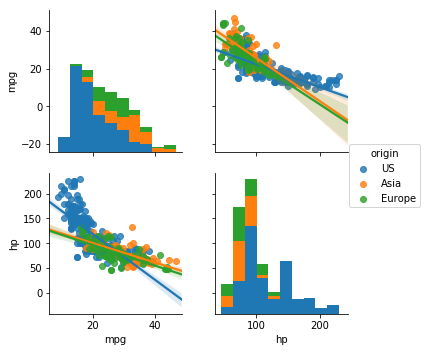

In [77]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto_new, kind='reg', hue='origin')

# Display the plot
plt.show()

### 6.3 Heat map

Plotting relationships between many variables using a pair plot can sometimes get visually overwhelming. It is therefore often useful to compute correlation coefficients between the variables instead. The correlation matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix).
<br>
<br>
Let's generate a heat map on a new DataFrame comprising of only five insteresting columns, 'mpg', 'hp', 'weight', 'accel', and 'displ'.

In [87]:
# Generate a new DataFrame: 'auto_new'
auto_new2 = auto.loc[:, ['mpg', 'hp', 'weight', 'accel', 'displ']]

# Compute the correlation matrix of the new DataFrame: corr_matrix
corr_matrix = auto_new2.corr()

# Show corr_matrix
corr_matrix

,mpg,hp,weight,accel,displ
mpg,1.000000,-0.778427,-0.832244,0.423329,-0.805127
hp,-0.778427,1.000000,0.864538,-0.689196,0.897257
weight,-0.832244,0.864538,1.000000,-0.416839,0.932994
accel,0.423329,-0.689196,-0.416839,1.000000,-0.543800
displ,-0.805127,0.897257,0.932994,-0.543800,1.000000


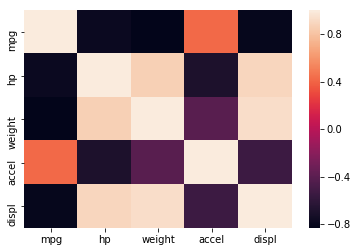

In [88]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix)

# Display the heatmap
plt.show()

Take a few minutes to get a sense of the relationships between multiple continuous variables. A rule of thumb for using heat maps: if your pair plot starts to get visually overwhelming, a heat map is a great alternative for visualizing multivariate relationships.

This concludes the visualization 'tour' by seaborn.